In [8]:
import pandas as pd
import seaborn as sns
import networkx as nx
import re

In [9]:
df = pd.read_csv("C:\\Users\\msi pc\\Documents\\PythonProjects\\MAS\\KarateClub.csv", sep=';')

In [10]:
df

,F,T
0,2,1
1,3,1
2,3,2
3,4,1
4,4,2
...,...,...
73,34,29
74,34,30
75,34,31
76,34,32


In [11]:
def getAdjacencyMatrix(df):
    adjacencyMatrix = []
    for i in range(0,34):
        adjacencyMatrix.append([])
        for j in range(0,34):
            adjacencyMatrix[i].append(0)
    for i in range(0,len(adjacencyMatrix)):
        for j in range(0, len(adjacencyMatrix[i])):
            for n in df.iterrows():
                if n[1][0] == i + 1 or n[1][1] == i + 1:
                    if n[1][0] == j + 1 or n[1][1] == j + 1:
                        adjacencyMatrix[i][j] = 1
    return adjacencyMatrix

In [22]:
def printAdjacencyMatrix(adjacencyMatrix):
    for i in range(0,len(adjacencyMatrix)):
        print(adjacencyMatrix[i])

In [13]:
def getAdjacencyList(adjacencyMatrix):
    adjacencyList = {}
    for i in range(0,len(adjacencyMatrix)):
        adjacencyList[i + 1] = []
        for j in range(0, len(adjacencyMatrix[i])):
            if adjacencyMatrix[i][j] == 1 and i != j:
                adjacencyList[i + 1].append(j + 1)
    return adjacencyList

In [15]:
adjacencyMatrix = getAdjacencyMatrix(df)
adjacencyList = getAdjacencyList(adjacencyMatrix)

In [16]:
len(adjacencyList[1])

16

In [17]:
def getMin(adjacencyList):
    result = 999
    for key in adjacencyList.keys():
        if(len(adjacencyList[key]) < result):
            result = len(adjacencyList[key])
    return result

def getMax(adjacencyList):
    result = -1
    for key in adjacencyList.keys():
        if(len(adjacencyList[key]) > result):
            result = len(adjacencyList[key])
    return result

def getAvg(adjacencyList):
    result = 0
    totalSum = 0
    for key in adjacencyList.keys():
        totalSum += len(adjacencyList[key])
    return totalSum/len(adjacencyList.keys())

def getFrequency(adjacencyList):
    vFrequency = {}
    min = getMin(adjacencyList)
    max = getMax(adjacencyList)
    for i in range(min, max + 1):
        vFrequency[i] = 0
    for key in adjacencyList.keys():
        if len(adjacencyList[key]) not in vFrequency.keys():
            vFrequency[len(adjacencyList[key])] = 0
        vFrequency[len(adjacencyList[key])] += 1
    return vFrequency


def getRelativeFrequency(adjacencyList):
    vFrequency = {}
    for key in adjacencyList.keys():
        if len(adjacencyList[key]) not in vFrequency.keys():
            vFrequency[len(adjacencyList[key])] = 0
        vFrequency[len(adjacencyList[key])] += 1
    for key in vFrequency.keys():
        vFrequency[key] = float(vFrequency[key]/34)
    return vFrequency

In [18]:
print("Min: " + str(getMin(adjacencyList)))
print("Max: " + str(getMax(adjacencyList)))
print("Avg: " + str(getAvg(adjacencyList)))
print("Četnost: " + str(getFrequency(adjacencyList)))
print("Relativní četnost: " + str(getRelativeFrequency(adjacencyList)))

Min: 1
Max: 17
Avg: 4.588235294117647
Četnost: {1: 1, 2: 11, 3: 6, 4: 6, 5: 3, 6: 2, 7: 0, 8: 0, 9: 1, 10: 1, 11: 0, 12: 1, 13: 0, 14: 0, 15: 0, 16: 1, 17: 1}
Relativní četnost: {16: 0.029411764705882353, 9: 0.029411764705882353, 10: 0.029411764705882353, 6: 0.058823529411764705, 3: 0.17647058823529413, 4: 0.17647058823529413, 5: 0.08823529411764706, 2: 0.3235294117647059, 1: 0.029411764705882353, 12: 0.029411764705882353, 17: 0.029411764705882353}


<Axes: >

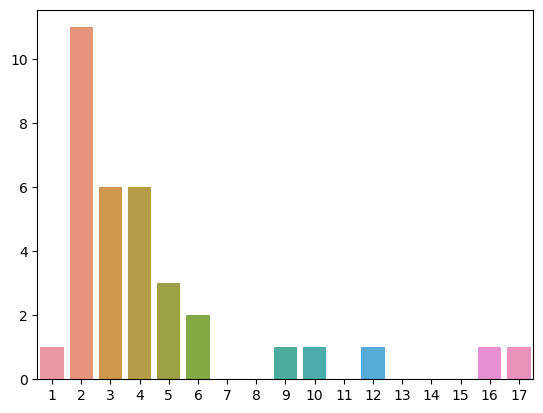

In [19]:
frequency = getFrequency(adjacencyList)
keys = list(frequency.keys())
vals = list(frequency.values())
sns.barplot(x=keys, y=vals)

In [23]:
printAdjacencyMatrix(adjacencyMatrix)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]
[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [11]:
def createGraphFromCSV(path, sep):
    listOfConnections = []
    with open(path, "r") as file:
        lines = file.readlines()
    for line in lines:
        regexString = "(\d*)"+sep+"(\d*)"
        match = re.match(regexString, line)
        if match is not None: 
            connection = (match.group(1),match.group(2))
            listOfConnections.append(connection)
        else:
            continue
    return listOfConnections

In [12]:
listOfConnections = createGraphFromCSV("C:\\Users\\msi pc\\Documents\\PythonProjects\\MAS\\KarateClub.csv", sep=';')

In [13]:
G = nx.Graph()

In [14]:
G.add_edges_from(listOfConnections)

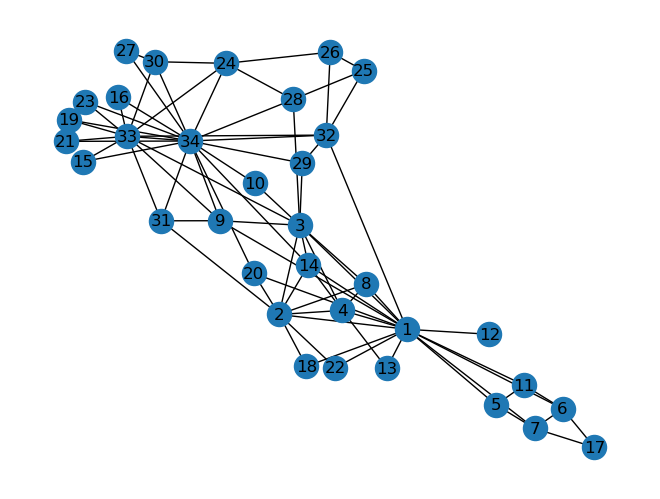

In [15]:
nx.draw_forceatlas2(G, with_labels = True)

In [57]:
print(dict(G.degree)['3'])

10


In [27]:
def getMinNX(graph):
    lowestDegree = 40000
    node = -1
    for key, value in dict(graph.degree).items():
        if lowestDegree > value:
            node = key
            lowestDegree = value
    return (node, lowestDegree)

def getMaxNX(graph):
    highestDegree = -1
    node = -1
    for key, value in dict(graph.degree).items():
        if highestDegree < value:
            node = key
            highestDegree = value
    return (node, highestDegree)

def getAvgNX(adjacencyList):
    result = 0
    totalSum = 0
    for key in adjacencyList.keys():
        totalSum += len(adjacencyList[key])
    return totalSum/len(adjacencyList.keys())

def getFrequencyNX(adjacencyList):
    vFrequency = {}
    min = getMin(adjacencyList)
    max = getMax(adjacencyList)
    for i in range(min, max + 1):
        vFrequency[i] = 0
    for key in adjacencyList.keys():
        if len(adjacencyList[key]) not in vFrequency.keys():
            vFrequency[len(adjacencyList[key])] = 0
        vFrequency[len(adjacencyList[key])] += 1
    return vFrequency


def getRelativeFrequencyNX(adjacencyList):
    vFrequency = {}
    for key in adjacencyList.keys():
        if len(adjacencyList[key]) not in vFrequency.keys():
            vFrequency[len(adjacencyList[key])] = 0
        vFrequency[len(adjacencyList[key])] += 1
    for key in vFrequency.keys():
        vFrequency[key] = float(vFrequency[key]/34)
    return vFrequency

In [26]:
getMinNX(G)

('12', 1)

In [28]:
getMaxNX(G)

('34', 17)